In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist,squareform
import os


def energy_test_2samp(D,W,num_perm=199):

    n0 = sum(W==0)
    n1 = sum(W==1)
    n=len(W)


    #Calculate Observered Energy Distance between samples
    E_obs = (n0*n1)/(n0+n1) * ( 2*(np.sum(D[W==1][:,W==0])/(n0*n1)) - (np.sum(D[W==0][:,W==0])/np.square(n0)) - (np.sum(D[W==1][:,W==1])/np.square(n1)))

    E_permutations = np.zeros((num_perm,1))

    #Sample from Distribution of Statistic
    for i in range(num_perm):
        permutation = np.random.choice(n,n,replace=False)
        D_permute = D[permutation][:,permutation]
        E_permutations[i] = (n0*n1)/(n0+n1) *  (2*(np.sum(D_permute[W==1][:,W==0])/(n0*n1)) - (np.sum(D_permute[W==0][:,W==0])/np.square(n0)) - (np.sum(D_permute[W==1][:,W==1])/np.square(n1)))

    return np.array(E_obs).reshape(1,-1), E_permutations

        #

In [2]:
df = pd.read_pickle("data_files/dtmri_dataframe_11_2.pkl") 
df = df[df['labels']!='#NULL!'] #remove subjects with missing labels
df = df.sort_values('labels',ignore_index=True) #sort by labels

tract_list = df.columns[1:-1]

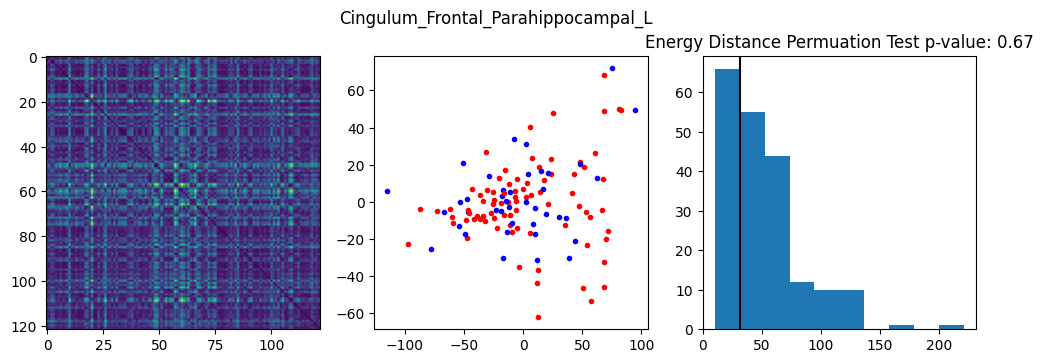

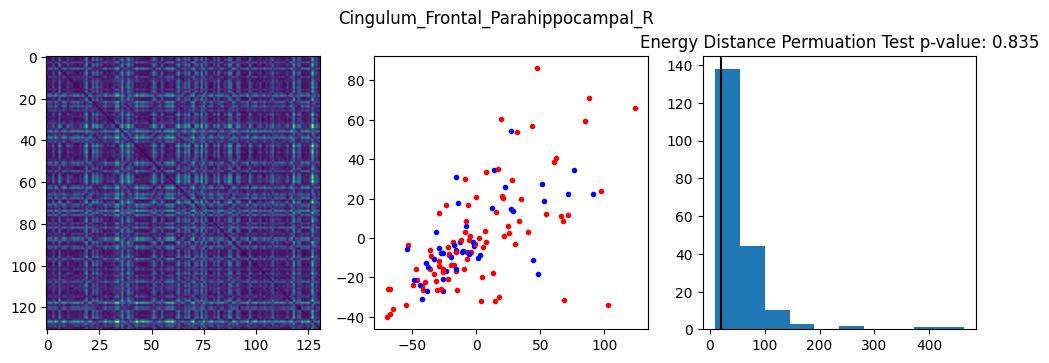

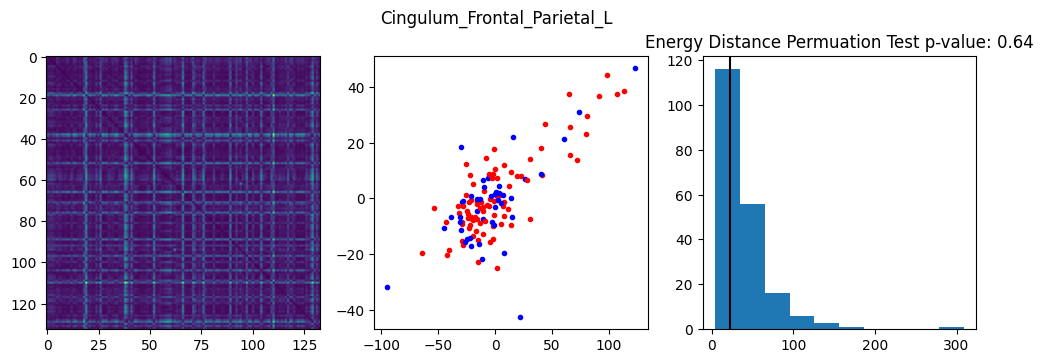

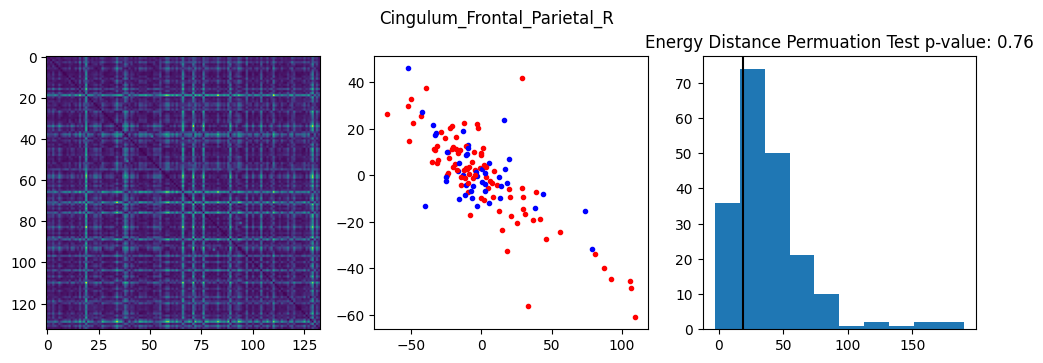

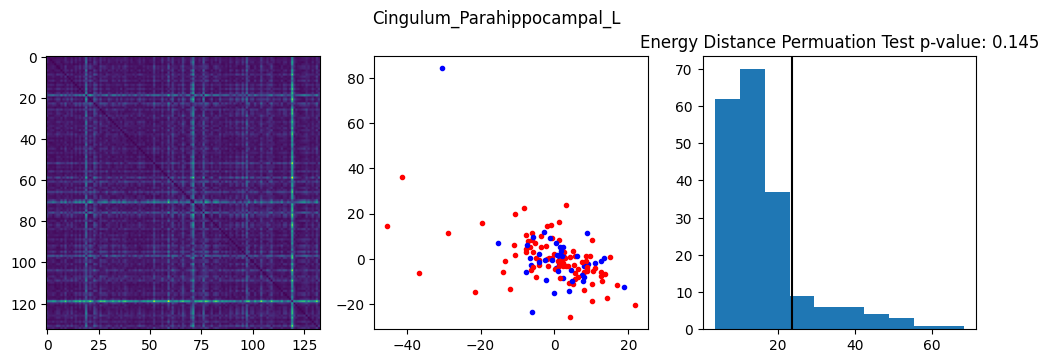

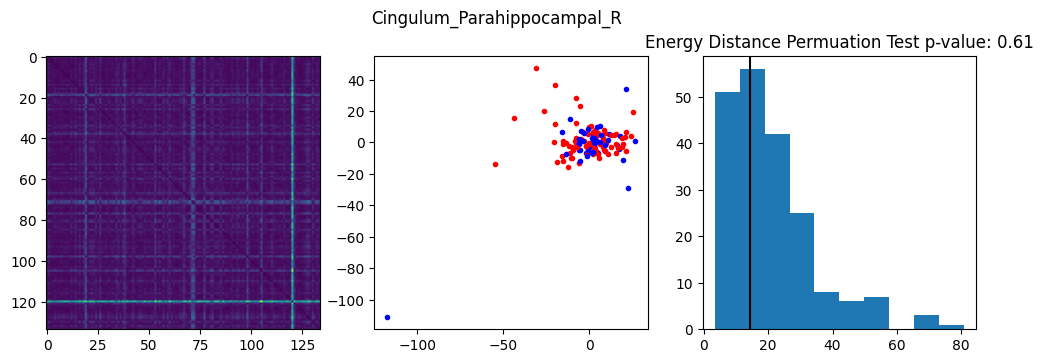

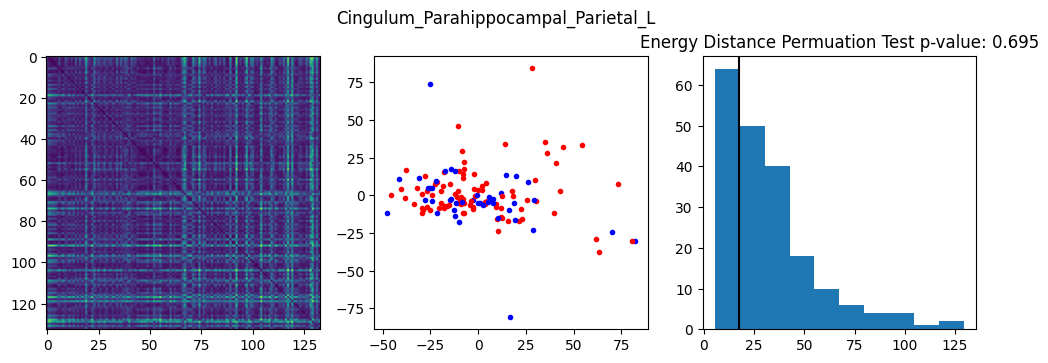

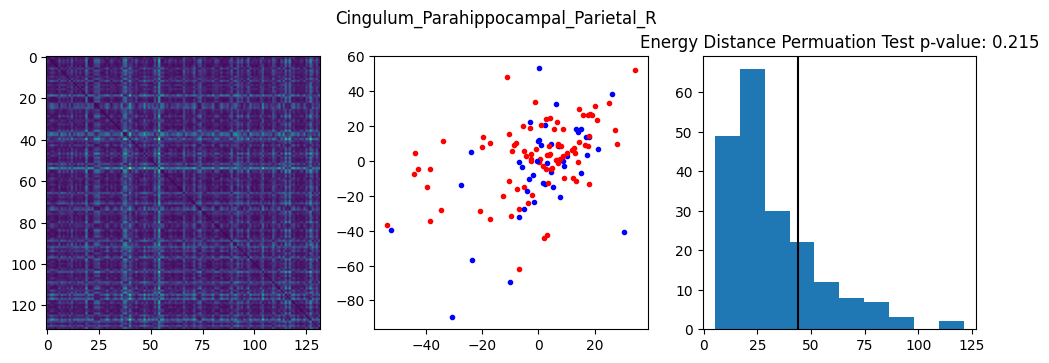

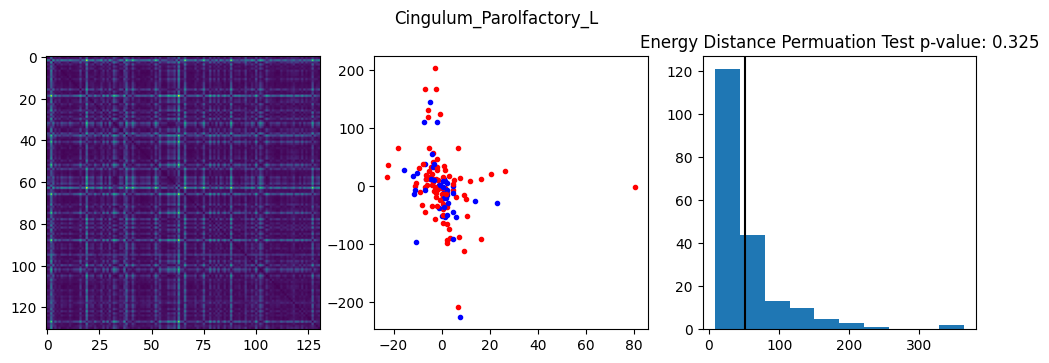

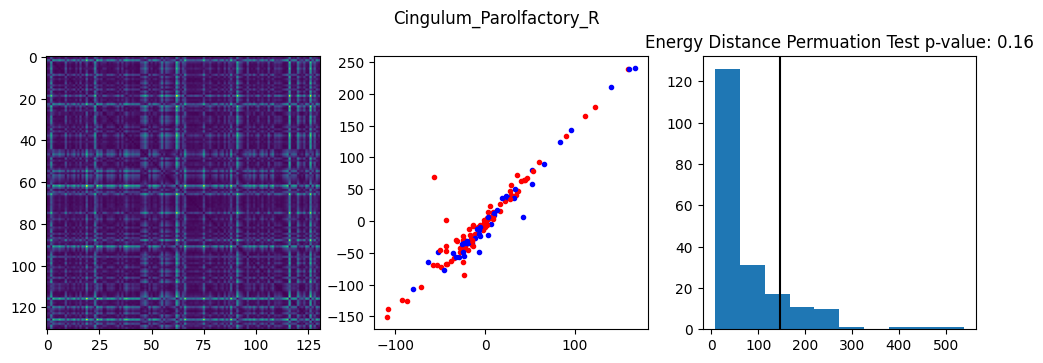

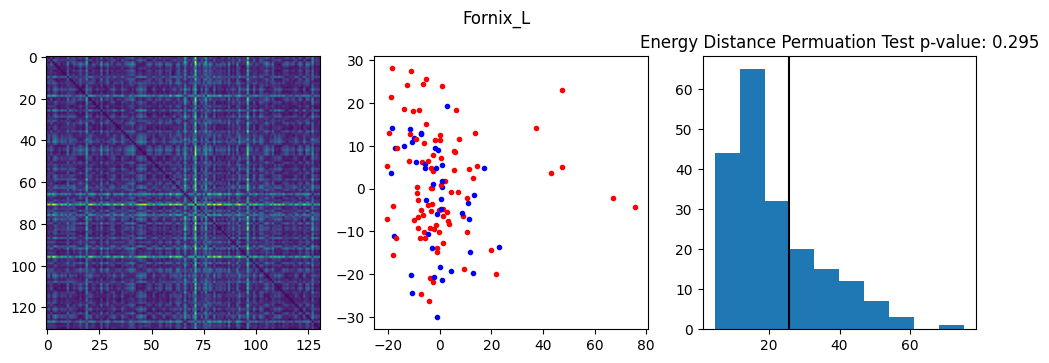

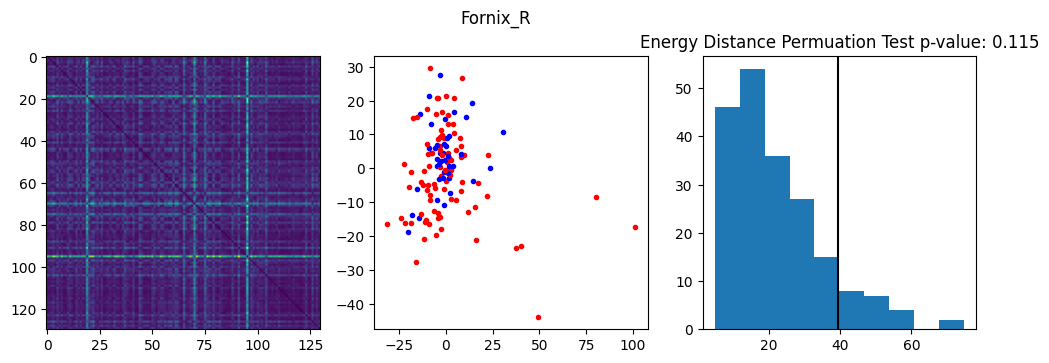

In [3]:
for tract in tract_list:
    
    if os.path.isfile("data_files/Distance Matrices/"+tract+".npy"):

        D = np.load("data_files/Distance Matrices/"+tract+".npy")
        labels = np.load("data_files/Distance Matrices/"+tract+"_labels.npy",allow_pickle=True).astype(int)

        plt.figure(figsize=(12,6))

        ##Plot Distance Matrix
        plt.subplot(1,3,1)
        plt.imshow(D)

        ##Plot MDS embedding
        plt.subplot(1,3,2)
        mds = MDS(dissimilarity='precomputed', normalized_stress='auto')
        embedding = mds.fit(D).embedding_

        c=['red','blue']

        for i,(x,y) in enumerate(embedding):

            plt.plot(x,y,'.',c=c[labels[i]])
            plt.gca().set_box_aspect(1)

        ##Plot Energy Statistic Empirical Distribution
        plt.subplot(1,3,3)
        E_obs, E_permutations = energy_test_2samp(D,labels)

        plt.hist(E_permutations)
        plt.axvline(E_obs,c='black')
        plt.title("Energy Distance Permuation Test p-value: "+str(np.mean(E_obs<=np.concatenate((E_obs,E_permutations)))))

        plt.gca().set_box_aspect(1)
        
        
        plt.gcf().suptitle(tract,y=.8)

        plt.show()